In [14]:
"""
@author: Vincent Maillou (vmaillou@iis.ee.ethz.ch)
@author: Lisa Gaedke-Merzhaeuser  (lisa.gaedke.merzhaeuser@usi.ch)
@date: 2023-11

Tests for cholesky selected decompositions routines.

Copyright 2023 ETH Zurich and USI. All rights reserved.
"""

from sdr.utils import matrix_transform
from sdr.utils import matrix_generation

from sdr.cholesky.cholesky_decompose import chol_dcmp_ndiags_arrowhead

import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
import pytest

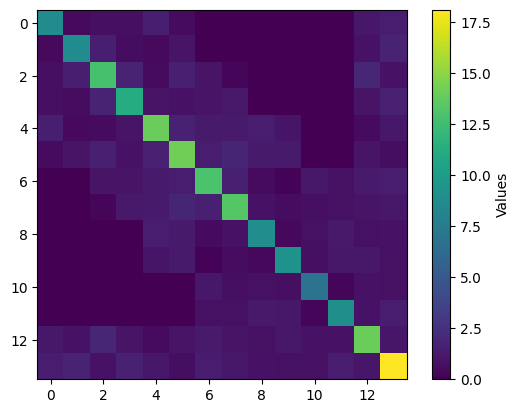

In [17]:
nblocks = 7
ndiags = 5
diag_blocksize = 2
arrow_blocksize = 2
symmetric = True
diagonal_dominant = True
seed = 63

A = matrix_generation.generate_ndiags_arrowhead(nblocks, ndiags, diag_blocksize, arrow_blocksize, symmetric, diagonal_dominant, seed)

plt.imshow(A, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Values')
plt.show()

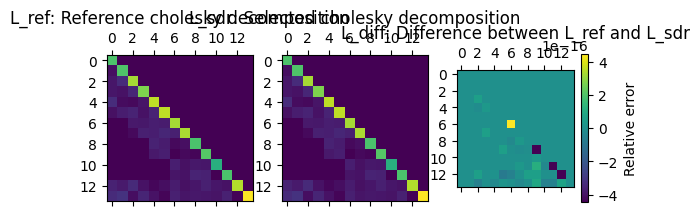

In [18]:
# --- Decomposition ---

fig, ax = plt.subplots(1, 3)
L_ref = la.cholesky(A, lower=True)
ax[0].set_title("L_ref: Reference cholesky decomposition")
ax[0].matshow(L_ref)

L_sdr = chol_dcmp_ndiags_arrowhead(A, nblocks, diag_blocksize, arrow_blocksize)
ax[1].set_title("L_sdr: Selected cholesky decomposition")
ax[1].matshow(L_sdr)

L_diff = L_ref - L_sdr
ax[2].set_title("L_diff: Difference between L_ref and L_sdr")
ax[2].matshow(L_diff)
fig.colorbar(ax[2].matshow(L_diff), ax=ax[2], label="Relative error", shrink=0.4)

plt.show()